In [6]:
import material as ml
import matplotlib.pyplot as plt
import thinfilm as tm
import numpy as np
import pandas as pd
from material import open_material as om
from scipy.optimize import basinhopping, minimize, differential_evolution

In [39]:
Acrylic = om('Acrylic', 'Sellmeier')
OC = om('OC', 'Sellmeier')
SiN = om('SiN', 'Sellmeier')
ITO = om('ITO', 'Sellmeier')
SiO2 = om('SiO2', 'Sellmeier')
sodalime = om('sodalime', 'Material')
glass = ml.Non_Dispersion(1.6)
air = ml.Non_Dispersion(1)
SiO2_t = ml.Non_Dispersion(1.5)
ITO_t = ml.Non_Dispersion(1.9)
SiN_t = ml.Non_Dispersion(2.1)

In [8]:
SiN.k = 1e-3
ITO.k = 1e-1
SiO2.k = 1e-1

In [9]:
x = 20
wl = np.linspace(400,700,301)[x:-x]
measurement = pd.read_csv("./mearsurement/R_5.csv")
RR = np.array([float(i) for i in measurement['SCAN']])[x:-x]
MB =  tm.Design([air, sodalime],[None, None])
RB = MB.reflectance(wl)
RA = (RR-RB)/(1+RR*RB-2*RB)

In [5]:
def FOM(D):
    SiO2.k = D[6]
    SiN.k = D[7]
    ITO.k = D[8]
    #SiO2_t.n = D[9]
    #SiN_t.n = D[10]
    #ITO_t.n = D[11]
    R = tm.Design([air, Acrylic, SiN, SiO2, ITO, SiO2, SiN, sodalime],
                  [None, D[0], D[1], D[2], D[3], D[4], D[5], None]).reflectance(wl, 5)
    return sum((R-(RA-1.4)/100)**2)

In [10]:
R = lambda D: tm.Design([air, Acrylic, SiN, SiO2, ITO, SiO2, SiN, sodalime],
                        [None, D[0], D[1], D[2], D[3], D[4], D[5], None]).reflectance(wl, 5)
FOM = lambda D: sum((R(D)-(RA-1.4)/100)**2)

In [41]:
bound = [(1400, 2200),(0, 20),(20,80),(15, 30),(20, 80),(0, 20)]
sim2 = differential_evolution(FOM, bound)

In [42]:
print(sim2.message)
print(sim2.x)

Optimization terminated successfully.
[1548.81285025   10.42221475   31.95601428   29.99072976   31.08199437
   11.24852242]


In [ ]:
SiO2_t.k = sim2.x[6]
SiN_t.k =  sim2.x[7]
ITO_t.k =  sim2.x[8]

In [ ]:
SiO2_t.n = sim2.x[9]
SiN_t.n = sim2.x[10]
ITO_t.n = sim2.x[11]

5.645233011911036


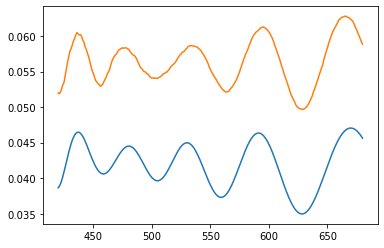

In [46]:
R = lambda D: tm.Design([air, Acrylic, SiN, SiO2, ITO, SiO2, SiN, sodalime], 
                        [None, D[0], D[1], D[2], D[3], D[4], D[5], None]).reflectance(wl, 5)
plt.plot(wl, R(sim2.x))
plt.plot(wl, (RA)/100)
print((sum(RA)/np.size(wl)))
plt.show()

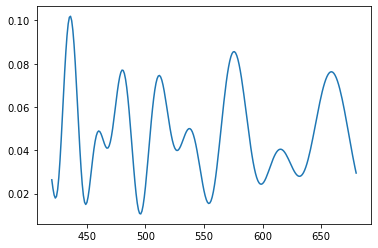

In [52]:
bridge = tm.Design([air, Acrylic, SiN, SiO2, ITO, OC, ITO, SiO2, SiN, sodalime],
         [None, 1548.81285025, 10.42221475, 31.95601428, 29.99072976, 1200 ,30, 31.08199437, 11.24852242, None]).reflectance(wl, 5)
plt.plot(wl, bridge)
plt.show()